#### Modules

In [14]:
import os
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import random

#### Functions

In [29]:
# Function to check image sizes
def check_image_sizes(df):
    n = 0
    for i in range(1, len(df)):
        if df.iloc[i]['ImageData'].shape != df.iloc[0]['ImageData'].shape:
            n += 1
    if len(df) == 17939:
        print("Wall dataset format check:")
    else:
        print("Deck dataset format check:")
    print(f'Expected image dimensions: {df.iloc[0]["ImageData"].shape}')
    print(f'Number of images with different dimensions: {n}\n')
    
# Function to plot random samples from a given DataFrame and label
def plot_random_row(df, label, title, num=8):
    samples = df[df['Label'] == label].sample(n=num)
    fig, axes = plt.subplots(1, num, figsize=(20, 5))
    for i, (idx, row) in enumerate(samples.iterrows()):
        ax = axes[i]
        ax.imshow(row['ImageData'])
        ax.set_title(f"{title}\nIdx: {idx}")
        ax.axis('off')
    plt.show()

#### Creat two dataframes to store labels and image data  (df_walls & df_decks)

In [8]:
# File path to wall and deck images
data_dirs = {"Walls": "Training_Pool_A_Walls",
             "Decks": "Training_Pool_B_Decks"}

# Labels imposed on each image based on dataset
categories = ["Cracked", "Non-Cracked"]

# Temporary lists to hold our data before creating DataFrames
walls_data = []
decks_data = []

# Read the cracked walls, uncracked walls, cracked decks, and uncracked decks
for domain, root_dir in data_dirs.items():
    for cat in categories:
        path = os.path.join(root_dir, cat)
        if os.path.exists(path):
            files = [f for f in os.listdir(path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
            for f in files:
                img_path = os.path.join(path, f)
                try:
                    with Image.open(img_path) as img:
                        # Store file name, label and image array in RGB format (3x256x256)
                        img_array = np.array(img.convert('RGB'))
                        entry = {"FileName": f, 
                                 "Label": cat,
                                 "ImageData": img_array}
                        # If the domain is Walls, append to walls_data, else append to decks_data
                        if domain == "Walls":
                            walls_data.append(entry)
                        else:
                            decks_data.append(entry)
                except Exception as e:
                    print(f"Error loading {f}: {e}")

# Create the two DataFrames
df_walls = pd.DataFrame(walls_data)
df_decks = pd.DataFrame(decks_data)

#### Example for How to retrieve data 

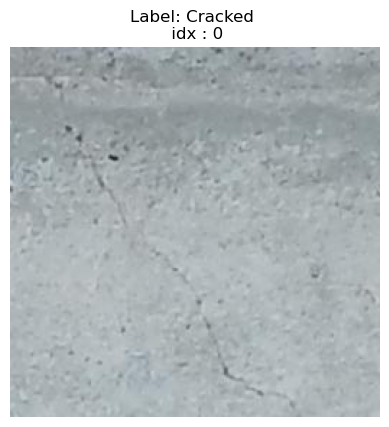

In [23]:
# Show the first image in the Walls set
file_number = 0
plt.imshow(df_walls[df_walls['Label'] == 'Cracked'].iloc[file_number]['ImageData'])
plt.title(f"Label: {df_walls[df_walls['Label'] == 'Cracked'].iloc[file_number]['Label']} \n idx : {file_number}")
plt.axis('off')
plt.show()

#### Count cracked samples and uncracked samples in both walls and decks dataset

In [9]:
print(f'Wall dataset label counts:\n{df_walls["Label"].value_counts()}\n')
print(f'Deck dataset label counts:\n{df_decks["Label"].value_counts()}')

Wall dataset label counts:
Label
Non-Cracked    14188
Cracked         3751
Name: count, dtype: int64

Deck dataset label counts:
Label
Non-Cracked    11496
Cracked         1926
Name: count, dtype: int64


#### Check whether all images have the same size

In [30]:
# Check wall data
check_image_sizes(df_walls)

# Check deck data
check_image_sizes(df_decks)

Wall dataset format check:
Expected image dimensions: (256, 256, 3)
Number of images with different dimensions: 0

Deck dataset format check:
Expected image dimensions: (256, 256, 3)
Number of images with different dimensions: 0



#### Visualize cracked wall, uncracked wall, cracked deck, uncracked deck images

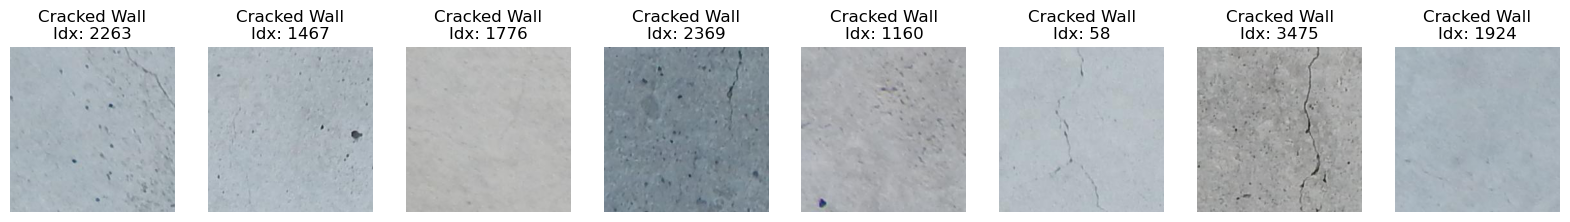

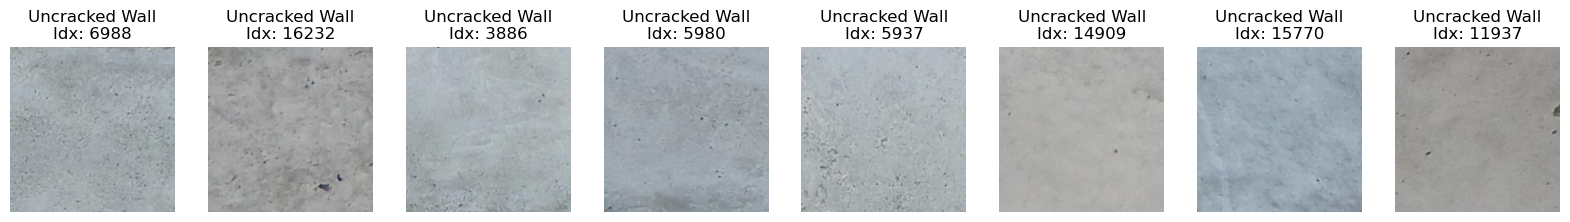

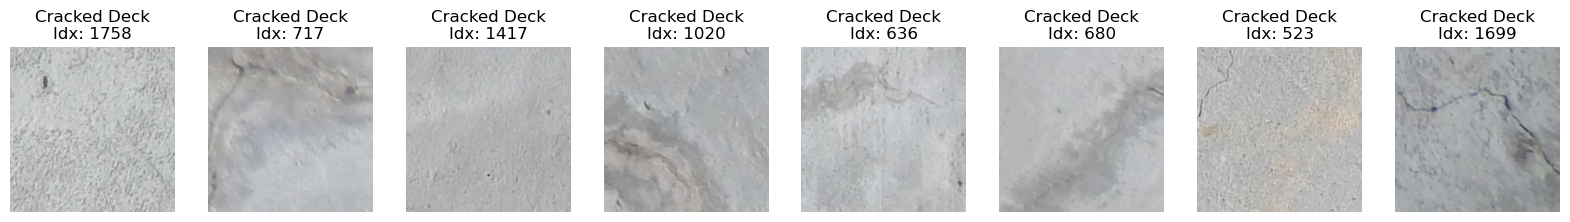

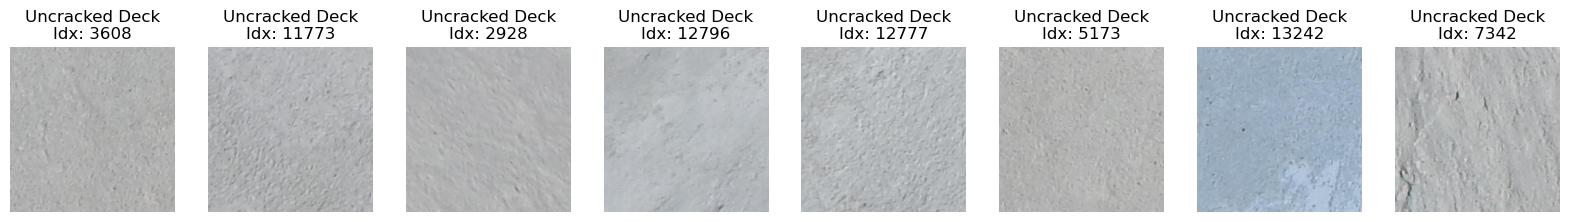

In [ ]:
# Wall images
plot_random_row(df_walls, 'Cracked', 'Cracked Wall')
plot_random_row(df_walls, 'Non-Cracked', 'Uncracked Wall')

# Deck images
plot_random_row(df_decks, 'Cracked', 'Cracked Deck')
plot_random_row(df_decks, 'Non-Cracked', 'Uncracked Deck')